In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_parquet('data/etf_data.parquet')
# data.head()

In [3]:
data.reset_index(inplace=True)
data.drop(columns=['trade_count', 'vwap', 'volume', 'open', 'high', 'low'],axis=1, inplace=True)
# data.info()

In [4]:
data['timestamp'] = pd.to_datetime(data['timestamp']).dt.tz_localize(None).dt.date
# data.head()

In [5]:
data_names = 'vnq_data', 'xle_data', 'xlf_data', 'xlu_data', 'xli_data', 'xlp_data', 'xlv_data', 'xlk_data', 'xlb_data', 'xlc_data', 'xly_data'

In [6]:
vnq_data = data[data['symbol'] == 'VNQ'].set_index('timestamp')
xle_data = data[data['symbol'] == 'XLE'].set_index('timestamp')
xlf_data = data[data['symbol'] == 'XLF'].set_index('timestamp')
xlu_data = data[data['symbol'] == 'XLU'].set_index('timestamp')
xli_data = data[data['symbol'] == 'XLI'].set_index('timestamp')
xlp_data = data[data['symbol'] == 'XLP'].set_index('timestamp')
xlv_data = data[data['symbol'] == 'XLV'].set_index('timestamp')
xlk_data = data[data['symbol'] == 'XLK'].set_index('timestamp')
xlb_data = data[data['symbol'] == 'XLB'].set_index('timestamp')
xlc_data = data[data['symbol'] == 'XLC'].set_index('timestamp')
xly_data = data[data['symbol'] == 'XLY'].set_index('timestamp')

In [7]:
def convert_name(value, dataframe):
    dataframe.rename(columns={"symbol": f"{value}", 'open': f'{value}_open', 'high': f'{value}_high', 'low': f'{value}_low', 'close': f'{value}_close'}, inplace=True)
    dataframe.drop([f'{value}'], inplace=True, axis=1)
    return dataframe

In [8]:
vnq_data = convert_name('vnq', vnq_data)
xle_data = convert_name('xle', xle_data)
xlf_data = convert_name('xlf', xlf_data)
xlu_data = convert_name('xlu', xlu_data)
xli_data = convert_name('xli', xli_data)
xlp_data = convert_name('xlp', xlp_data)
xlv_data = convert_name('xlv', xlv_data)
xlk_data = convert_name('xlk', xlk_data)
xlb_data = convert_name('xlb', xlb_data)
xlc_data = convert_name('xlc', xlc_data)
xly_data = convert_name('xly', xly_data)

# vnq_data.head()

In [9]:
# def pct_change_calculator(name, dataframe):
#     dataframe[f'{name}_change'] = dataframe[f'{name}_close'].pct_change() * 100
#     return dataframe

# vnq_data = pct_change_calculator('vnq', vnq_data)
# xle_data = pct_change_calculator('xle', xle_data)
# xlf_data = pct_change_calculator('xlf',xlf_data)
# xlu_data = pct_change_calculator('xlu',xlu_data)
# xli_data = pct_change_calculator('xli',xli_data)
# xlp_data = pct_change_calculator('xlp',xlp_data)
# xlv_data = pct_change_calculator('xlv',xlv_data)
# xlk_data = pct_change_calculator('xlk',xlk_data)
# xlb_data = pct_change_calculator('xlb',xlb_data)
# xlc_data = pct_change_calculator('xlc',xlc_data)
# xly_data = pct_change_calculator('xly',xly_data)


In [10]:
final_df = vnq_data.join([xlf_data,xlu_data,xli_data,xlp_data,xlv_data,xlk_data,xlb_data,xlc_data,xly_data, xle_data])
# final_df.head()

In [11]:
final_df.index = pd.to_datetime(final_df.index)

In [12]:
final_df.reset_index(inplace=True)
# final_df.head()

In [13]:
grouped = final_df.groupby([final_df['timestamp'].dt.year, final_df['timestamp'].dt.month])

last_day_of_month = grouped['timestamp'].max()

df = pd.DataFrame(last_day_of_month)
df['id'] = range(1, len(df) + 1)
df.set_index('id', inplace=True)
# df.head()

In [14]:
final_df = final_df.merge(df, on='timestamp', how='right')     
final_df.set_index('timestamp', inplace=True)

In [15]:
final_df.reset_index(inplace=True, drop=True)

In [16]:
final_df.pct_change(fill_method='ffill')

C:\Users\lklun\AppData\Local\Temp\ipykernel_17464\2756650250.py:1: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  final_df.pct_change(fill_method='ffill')


,vnq_close,xlf_close,xlu_close,xli_close,xlp_close,xlv_close,xlk_close,xlb_close,xlc_close,xly_close,xle_close
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.034366,-0.088544,0.049445,-0.056970,0.005348,-0.077190,-0.037124,-0.107094,NaN,-0.051826,-0.034980
2,-0.003637,-0.029006,0.019375,0.042609,0.003152,-0.003623,-0.006547,0.078153,NaN,0.004453,-0.028002
3,0.092426,0.066856,0.071706,0.064275,0.042027,0.023416,0.082743,0.072010,NaN,0.062601,0.093849
4,-0.023508,0.036000,-0.024184,0.012439,-0.014323,0.029667,-0.050271,0.051105,NaN,0.001264,0.090645
...,...,...,...,...,...,...,...,...,...,...,...
88,0.003131,0.031726,0.019057,-0.011662,0.036541,0.031438,-0.001192,-0.001364,0.033293,-0.011234,0.027768
89,-0.039616,-0.042508,-0.058713,-0.031500,-0.061596,-0.042687,0.089173,-0.068653,0.039065,0.025362,-0.100317
90,0.044500,0.061398,0.007855,0.108105,0.020641,0.038332,0.058315,0.104639,0.045630,0.120045,0.059799
91,0.020345,0.048057,0.024908,0.028886,0.021302,0.010698,0.025825,0.034391,0.057007,0.023144,0.077738


C:\Users\lklun\AppData\Local\Temp\ipykernel_17464\3158566933.py:2: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  sns.heatmap(final_df.pct_change(fill_method='ffill'), cmap='coolwarm')


<Axes: >

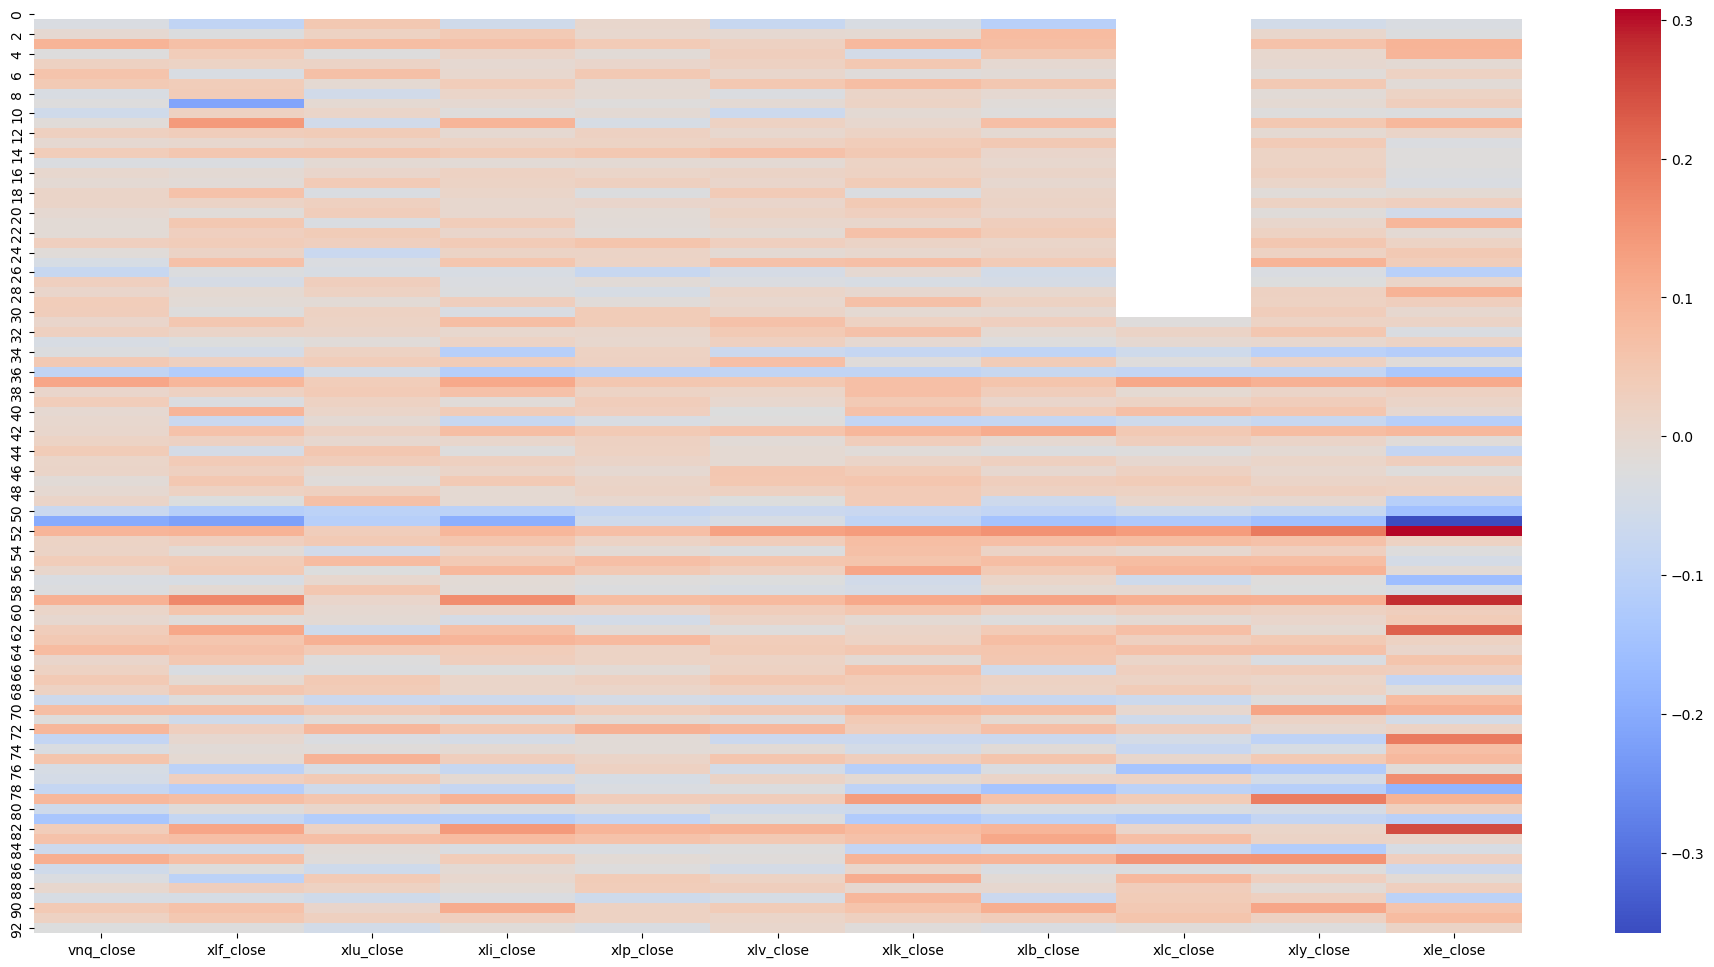

In [17]:
plt.figure(figsize=(24,12))
sns.heatmap(final_df.pct_change(fill_method='ffill'), cmap='coolwarm')

In [18]:
final_df

,vnq_close,xlf_close,xlu_close,xli_close,xlp_close,xlv_close,xlk_close,xlb_close,xlc_close,xly_close,xle_close
0,79.73,23.83,43.28,53.01,50.49,72.0300,42.83,43.42,NaN,78.1608,60.32
1,76.99,21.72,45.42,49.99,50.76,66.4700,41.24,38.77,NaN,74.1100,58.21
2,76.71,21.09,46.30,52.12,50.92,66.2292,40.97,41.80,NaN,74.4400,56.58
3,83.80,22.50,49.62,55.47,53.06,67.7800,44.36,44.81,NaN,79.1000,61.89
4,81.83,23.31,48.42,56.16,52.30,69.7908,42.13,47.10,NaN,79.2000,67.50
...,...,...,...,...,...,...,...,...,...,...,...
88,83.30,33.17,68.98,100.00,77.44,133.5300,150.83,80.55,59.90,147.8600,85.13
89,80.00,31.76,64.93,96.85,72.67,127.8300,164.28,75.02,62.24,151.6100,76.59
90,83.56,33.71,65.44,107.32,74.17,132.7300,173.86,82.87,65.08,169.8100,81.17
91,85.26,35.33,67.07,110.42,75.75,134.1500,178.35,85.72,68.79,173.7400,87.48


C:\Users\lklun\AppData\Local\Temp\ipykernel_17464\2065923491.py:2: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  plt.plot(final_df.pct_change(fill_method='ffill'))


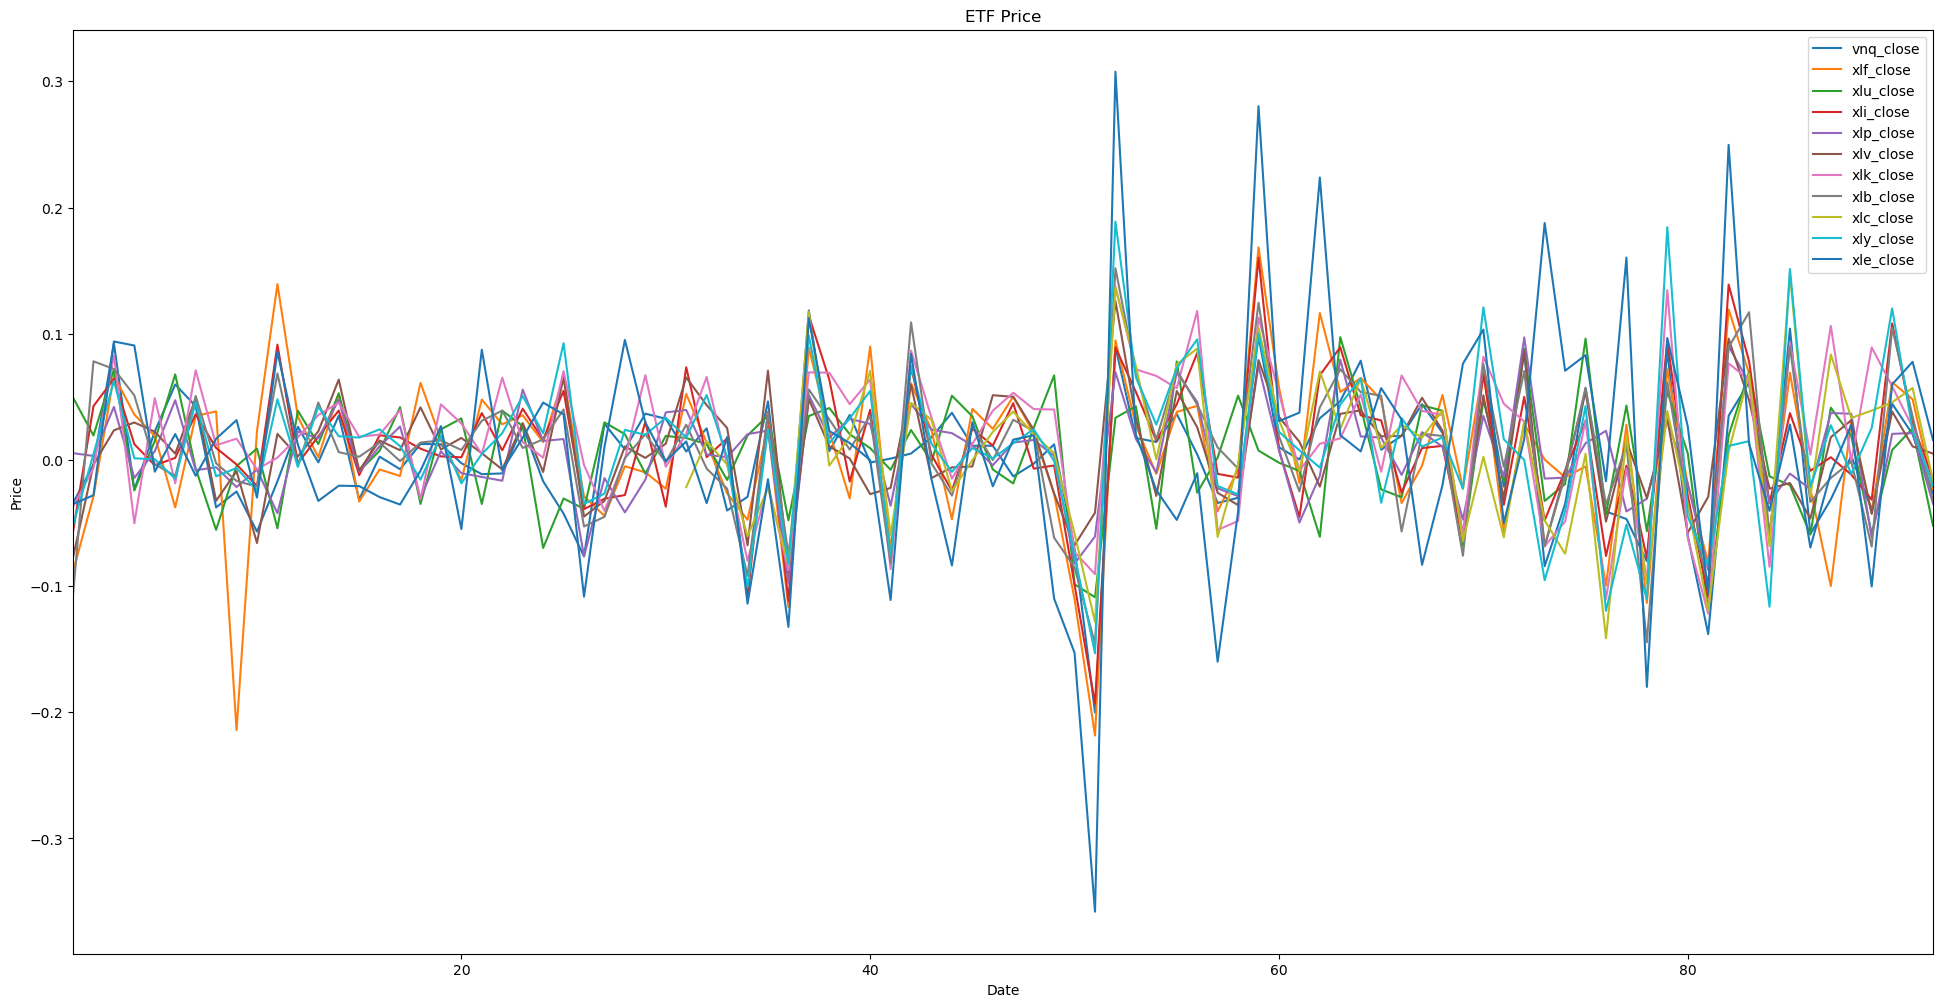

In [19]:
plt.figure(figsize=(24,12))
plt.plot(final_df.pct_change(fill_method='ffill'))
plt.margins(x=0)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ETF Price')
plt.legend(final_df.columns)
plt.show()